In [1]:
import pyrealsense2 as rs
from collections import deque
import numpy as np
import cv2
from Image_Handler import Image_Handler
import sys
sys.path.append('../')
from Hardware.mainboard import *
from Hardware.Motor import *
from time import sleep
import threading
import ctypes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pipeline = rs.pipeline(rs.context())
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

pipeline.start(config)

(480, 640)


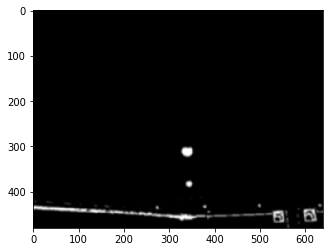

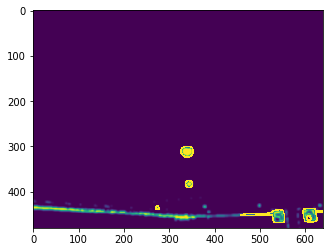

In [20]:
greenLower = (25,0,56)
greenUpper = (150,255,146)
frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
color_frame = frames.get_color_frame()
color_image = np.asanyarray(color_frame.get_data())
hsv = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, greenLower, greenUpper)
nmask = cv2.GaussianBlur(mask,(9,9),2,2)
    # Convert to gray
gray = nmask.copy()
#gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
# get current positions of four trackbars
#r = cv2.getTrackbarPos('Treshold','Treshed')
r=50
plt.imshow(gray,cmap='gray')

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray,r,255,cv2.THRESH_BINARY)



# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)

# Find contours
_, contours, _= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


contour_list = []
for contour in contours:
    # approximte for circles
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)

# Draw contours on the original image
cv2.drawContours(clone, contour_list,  -1, (255,0,0), 2)
plt.figure()
print(clone.shape)
plt.imshow(clone)

[]

In [ ]:




# there is an outer boundary and inner boundary for each eadge, so contours double
print('Number of found circles: {}'.format(int(len(contour_list)/2)))

#Displaying the results     
cv2.imshow('Objects Detected', clone)
cv2.imshow("Treshed", gray_threshed)

# ESC to break
k = cv2.waitKey(1) & 0xFF
if k == 27:
    break

# close all open windows
cv2.destroyAllWindows()